# 1 . Import Dependencies

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2 . EDA

## Loading Data

In [35]:
df = pd.read_csv('drug200.csv')

In [36]:
# Check the Dimensions of Data
df.shape

(200, 6)

In [37]:
# Check top 5 rows of the dataframe
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [38]:
# Check bottom 5 rows of the dataframe
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [39]:
# Check the data types of columns
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [40]:
# Check for Null values
df.isnull().mean()

Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64

## Encoding Categorical Data

In [41]:
# Checking Number of Classes in each Feature
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [42]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [43]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [44]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

### Binary Encoding

In [45]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [46]:
df['Sex'] = lb.fit_transform(df['Sex'])
df['Cholesterol'] = lb.fit_transform(df['Cholesterol'])

### Multi Class Encoding

In [47]:
le = preprocessing.LabelEncoder()

In [48]:
df['BP'] = le.fit_transform(df['BP'])
df['Drug'] = le.fit_transform(df['Drug'])

## Visualization

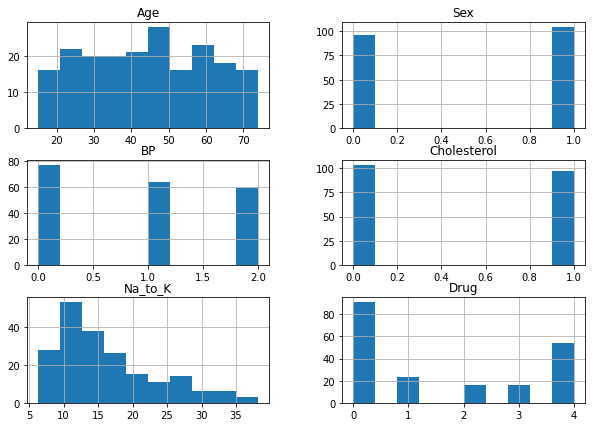

In [55]:
df.hist(figsize=(10,7));

Note: The column 'Na_to_K' shows skewness hence need to deal with outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


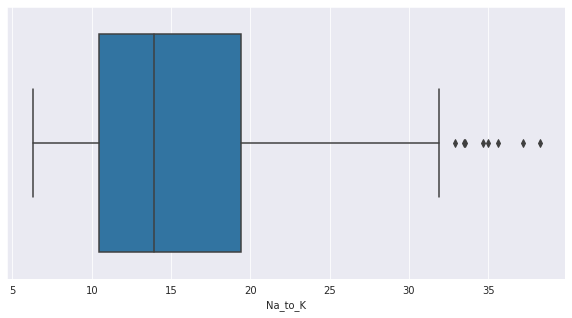

In [64]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.boxplot(df['Na_to_K']);

## Feature Engineering

### Log Transforming the Skewed Data

In [65]:
df['Na_to_K_log'] = df['Na_to_K'].map(lambda x: np.log(x))

<AxesSubplot:>

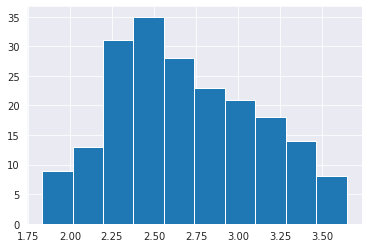

In [67]:
# Checking the distribution
df['Na_to_K_log'].hist()

In [68]:
# Check the skewness
print(df['Na_to_K'].skew())
print(df['Na_to_K_log'].skew())

1.039341186028881
0.30466789643614745


# Model Creation

## Splitting the Data

In [69]:
from sklearn.model_selection import train_test_split

X = df.drop(['Drug','Na_to_K'],axis=1)
y = df['Drug']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
len(X_train),len(X_test)

(160, 40)

## Fitting the Model 

The models we will use are: 
1. KNN
2. Naive Bayes
3. Random Forests
4. SVM

### Model 1: KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [80]:
y_pred = classifier.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[12,  0,  0,  1,  2],
       [ 5,  1,  0,  0,  0],
       [ 2,  0,  1,  0,  0],
       [ 3,  0,  0,  1,  1],
       [ 6,  1,  2,  0,  2]])

In [82]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 42.5


### Model 2 : Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [84]:
gnb.fit(X_train,y_train)

GaussianNB()

In [87]:
y_pred = gnb.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 90.0


In [ ]:
### Model 3: